# Using Machine Learning to Explore Win-Shares

### Data from Basketball-Reference.com

In [20]:
#Setting up Libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import accuracy_score

print("Libraries imported.")

Libraries imported.


In [2]:
ws_df = pd.read_csv(r'C:\Users\Todo\Desktop\NBA_Projects\2019win-shares.csv')

In [3]:
ws_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS▼,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,James Harden\hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,NaN,11.4,3.8,15.2,0.254,NaN,9.4,1.6,11.0,9.3
1,2,Giannis Antetokounmpo\antetgi01,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,NaN,8.9,5.5,14.4,0.292,NaN,6.3,4.1,10.4,7.4
2,3,Rudy Gobert\goberru01,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,NaN,8.7,5.7,14.4,0.268,NaN,3.0,2.5,5.4,4.8
3,4,Damian Lillard\lillada01,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,NaN,9.7,2.4,12.1,0.205,NaN,6.6,-0.3,6.4,6.0
4,5,Paul George\georgpa01,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,NaN,7.0,4.9,11.9,0.201,NaN,5.6,1.6,7.2,6.6


In [4]:
#Clean by dropping the two weird rows
ws_df = ws_df.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1)
ws_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS▼,WS/48,OBPM,DBPM,BPM,VORP
0,1,James Harden\hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,9.4,1.6,11.0,9.3
1,2,Giannis Antetokounmpo\antetgi01,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,6.3,4.1,10.4,7.4
2,3,Rudy Gobert\goberru01,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,8.7,5.7,14.4,0.268,3.0,2.5,5.4,4.8
3,4,Damian Lillard\lillada01,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-0.3,6.4,6.0
4,5,Paul George\georgpa01,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,5.6,1.6,7.2,6.6


In [5]:
#I was getting a 'infinite value error' with the whole dataset, but using the top 100 fixed that problem
#I'll have to find out what causes that error later
t_100 = ws_df.head(100)

In [6]:
t_100.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS▼,WS/48,OBPM,DBPM,BPM,VORP
0,1,James Harden\hardeja01,PG,29,HOU,78,2867,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,9.4,1.6,11.0,9.3
1,2,Giannis Antetokounmpo\antetgi01,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,6.3,4.1,10.4,7.4
2,3,Rudy Gobert\goberru01,C,26,UTA,81,2577,24.6,0.682,0.000,0.733,13.2,30.2,21.9,9.6,1.2,5.8,12.1,17.8,8.7,5.7,14.4,0.268,3.0,2.5,5.4,4.8
3,4,Damian Lillard\lillada01,PG,28,POR,80,2838,23.7,0.588,0.419,0.335,2.6,11.1,7.0,30.6,1.5,1.0,10.8,29.3,9.7,2.4,12.1,0.205,6.6,-0.3,6.4,6.0
4,5,Paul George\georgpa01,SF,28,OKC,77,2841,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,5.6,1.6,7.2,6.6


In [ ]:
#From the decision tree documentation when I was figuring out features and target

#from sklearn.datasets import load_iris
#from sklearn import tree
#X, y = load_iris(return_X_y=True)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

In [35]:
features = t_100[['Age','PER','ORB%', 'DRB%', 'AST%', 'BLK%', 'TOV%', 'USG%']].values

In [36]:
features[:5,:]

array([[29. , 30.6,  2.5, 17.8, 39.5,  1.7, 14.5, 40.5],
       [24. , 30.9,  7.3, 30. , 30.3,  3.9, 14.8, 32.3],
       [26. , 24.6, 13.2, 30.2,  9.6,  5.8, 12.1, 17.8],
       [28. , 23.7,  2.6, 11.1, 30.6,  1. , 10.8, 29.3],
       [28. , 23.3,  3.7, 19.6, 17.7,  1. , 10. , 29.5]])

In [37]:
target = t_100['WS▼'] #I could clean the weird character out, but it's okay for now

In [38]:
target.head()

0    15.2
1    14.4
2    14.4
3    12.1
4    11.9
Name: WS▼, dtype: float64

In [39]:
#Partition win shares into 3 categories
target = pd.cut(target,3,labels=["bad","medium","good"])

In [40]:
target.head()

0    good
1    good
2    good
3    good
4    good
Name: WS▼, dtype: category
Categories (3, object): [bad < medium < good]

In [41]:
target.value_counts()

bad       77
medium    17
good       6
Name: WS▼, dtype: int64

### Maybe I should tweak this, since the vast majority of players have 'bad' win shares

In [42]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)

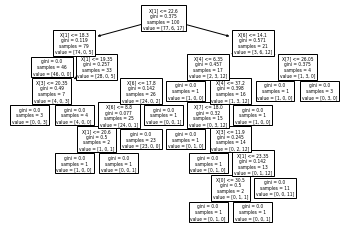

In [43]:
tree.plot_tree(clf); 

## It appears as though PER was the best predictor for Win Shares. 

### Win Shares = Marginal Offense / Marginal Points per Win

### Marginal Offense = points - .92(league ppp)*(# possessions)
### Marginal PPW = .32*(leage ppg)*(team pace / league pace)

#### ==> Win shares is heavily influenced by points

### PER = an enormous formula with so many variables, it makes your head spin

#### PER is notorious for being heavily influenced by offense, keeping defensive specialists off the list. 

#### ==> PER is heavily influenced by points. 

## The reason for PER being a great predictor for win shares is much more clear now. 

### Other interesting observations:
#### - The right side is high PER, left side is low PER, low PER completely partitions all good players off. 
#### - The 'good' WS players (right side) are then split by turnovers
#### - The high turnover players that have high rebounding are NOT 'good' win share players (Possible lurking variable - due to rebounders not scoring as much)
#### - The low turnover players that have high usage make up the bulk of remaining 'good' and 'medium'

In [33]:
#Plot Win Shares vs PER to see the relationship

x = t_100['PER'].values
y = t_100['WS▼'].values

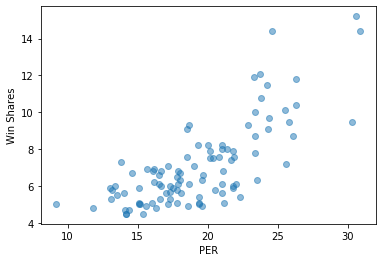

In [34]:
plt.scatter(x,y,alpha=.5)
plt.xlabel('PER')
plt.ylabel('Win Shares')
plt.show()

### A moderately strong relationship between the two. Due to the probable presence of either lurking variables, or violation of independence, lets explore further

### I want to find out what PER most depends on
### I'll make another decision tree

In [30]:
#PER
features = t_100[['Age', 'TS%','ORB%', 'DRB%', 'AST%', 'BLK%', 'TOV%', 'USG%']].values
target = t_100['PER'].values
target = pd.cut(target,3,labels=["bad","medium","good"])

In [31]:
target.value_counts()

bad       26
medium    59
good      15
dtype: int64

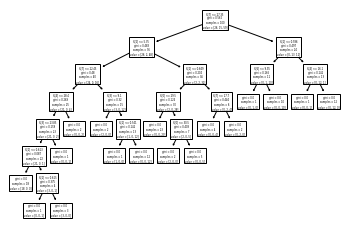

In [32]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)
tree.plot_tree(clf); 

## The 'Good' PER category depends the most on Usage %, True Shooting %, and Assist % in that order.

#### I need to go back and add TS% in the Win Shares model.

In [26]:
#Try decision tree on Win Shares again, without PER, and with TS%
features = t_100[['Age', 'TS%','ORB%', 'DRB%', 'AST%', 'BLK%', 'TOV%', 'USG%']].values
target = t_100['WS▼'].values
target = pd.cut(target,3,labels=["bad","medium","good"])

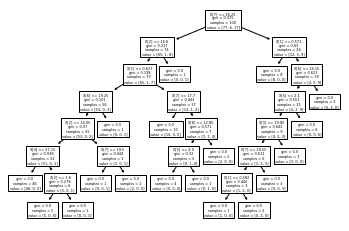

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)
tree.plot_tree(clf); 

### The right side of the tree yielded only 2 quality partitions of the 'good' category.
## Win Shares now most depends on Usage % and True Shooting %.
#### These are the same as the 2 best variables for PER.

## Because PER and WS are dependent on the same variables, I don't think it would be a good predictor, due to a violation of independence. 

### I would use Usage %, and True Shooting. 